In [1]:
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout, Dense,AveragePooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
import os
print(os.listdir('short'))

['train', 'test', 'Train.csv', 'Test.csv']


In [3]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]
height = 32
width =32
channels = 3
num_classes = 43
n_inputs = height * width*channels
for i in range(num_classes) :
    s="images/train/{0}/".format(i)
    print(s)
    imageset=os.listdir(s)
    for imgs  in imageset:
        image=cv2.imread(s+imgs)
        i_array = Image.fromarray(image, 'RGB')
        size = i_array.resize((height, width))
        data.append(np.array(size))
        labels.append(i)

images/train/0/
images/train/1/
images/train/2/
images/train/3/
images/train/4/
images/train/5/
images/train/6/
images/train/7/
images/train/8/
images/train/9/
images/train/10/
images/train/11/
images/train/12/
images/train/13/
images/train/14/
images/train/15/
images/train/16/
images/train/17/
images/train/18/
images/train/19/
images/train/20/
images/train/21/
images/train/22/
images/train/23/
images/train/24/
images/train/25/
images/train/26/
images/train/27/
images/train/28/
images/train/29/
images/train/30/
images/train/31/
images/train/32/
images/train/33/
images/train/34/
images/train/35/
images/train/36/
images/train/37/
images/train/38/
images/train/39/
images/train/40/
images/train/41/
images/train/42/


In [4]:
x_train=np.array(data)
x_train= x_train/255.0
y_train=np.array(labels)
y_train=keras.utils.to_categorical(y_train,num_classes)

In [5]:
# Spli|t Data
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size = 0.15,random_state=0)
print("Train :", X_train.shape)
print("Test :", X_test.shape)

Train : (33327, 32, 32, 3)
Test : (5882, 32, 32, 3)


In [6]:
# Build Model

model = keras.Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), activation='tanh', input_shape=X_train.shape[1:]))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='tanh'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(43, activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Train Model
epochs =15
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), batch_size=64, epochs=epochs,shuffle=True)

Epoch 1/15
521/521 [==============================] - 17s 33ms/step - loss: 1.2537 - accuracy: 0.6756 - val_loss: 0.4066 - val_accuracy: 0.8995
Epoch 2/15
521/521 [==============================] - 16s 30ms/step - loss: 0.2837 - accuracy: 0.9316 - val_loss: 0.1966 - val_accuracy: 0.9529
Epoch 3/15
521/521 [==============================] - 16s 30ms/step - loss: 0.1554 - accuracy: 0.9639 - val_loss: 0.1250 - val_accuracy: 0.9721
Epoch 4/15
521/521 [==============================] - 16s 31ms/step - loss: 0.1014 - accuracy: 0.9779 - val_loss: 0.1061 - val_accuracy: 0.9738
Epoch 5/15
521/521 [==============================] - 16s 31ms/step - loss: 0.0726 - accuracy: 0.9847 - val_loss: 0.0894 - val_accuracy: 0.9770
Epoch 6/15
521/521 [==============================] - 16s 31ms/step - loss: 0.0504 - accuracy: 0.9902 - val_loss: 0.0707 - val_accuracy: 0.9835
Epoch 7/15
521/521 [==============================] - 16s 31ms/step - loss: 0.0378 - accuracy: 0.9924 - val_loss: 0.0656 - val_accuracy:

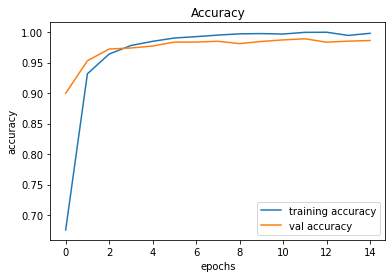

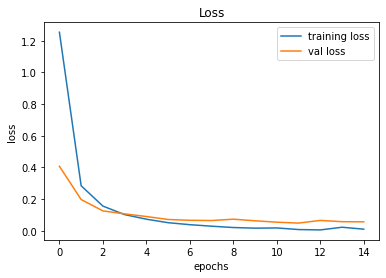

In [11]:
import matplotlib.pyplot as plt
from keras import models

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [12]:
# Predicting Test data 
y_test=pd.read_csv("images/Test.csv")
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('images/test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

print(len(data))
X_test=np.array(data)
X_test = X_test.astype('float32')/255  
pred = np.argmax(model.predict(X_test), axis=-1)

12630


In [17]:
# Accuracy with the test data
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, pred)
print('Accuracy ',acc*100.00)
from sklearn.metrics import precision_score
pre=precision_score(y_test, pred, average='weighted')
print('Precision ',pre*100)
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred, average='weighted')
print('F1 score ',f1*100)

Accuracy  91.43309580364212
Precision  91.61797836936123
F1 score  91.41130997527164


Train image


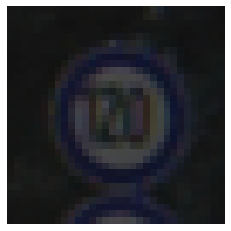

Size of this image is (32, 32, 3)


In [14]:
# Show images
import matplotlib.pyplot as plt

def display_images(image, label):
        plt.axis('off')
        plt.imshow(image)
        plt.show()       
        print("Size of this image is " + str(image.shape))
#         print("Class of the image is " + str(labels))

print("Train image")
display_images(X_train[2], Y_train[2])

In [15]:
signs=[
    "Speed limit 20",
    "Speed limit 30",
    "Speed limit 50",
    "Speed limit 60",
    "Speed limit 70",
    "Speed limit 80",
    "Speed limit 90",
    "Speed limit 100",
    "Speed limit 120",
    "No passing",
    "No passing for vechiles over 3.5 metric tons",
    "Right-of-way at the next intersection",
    "Priority road",
    "Yield",
    "Stop",
    "No vehicles",
    "Vehicles over 3.5 metric tons prohibited",
    "No entry",
    "General caution",
    "Dangerous curve to the left",
    "Dangerous curve to the right",
    "Double curve",
    "Bumpy road",
    "Slippery road",
    "Road narrows on the right",
    "Road work",
    "Traffic signals",
    "Pedestrians",
    "Children crossing",
    "Bicycles crossing",
    "Beware of ice/snow",
    "Wild animals crossing",
    "End of all speed and passing limits",
    "Turn right ahead",
    "Turn left ahead",
    "Ahead only",
    "Go straight or right",
    "Go straight or left",
    "Keep right",
    "Keep left",
    "Roundabout mandatory",
    "End of no passing",
    "End of no passing by vechiles over 3.5 metric tons"
]

The sign says :Yield


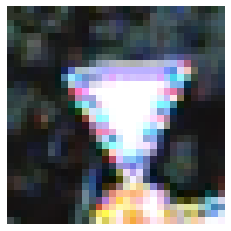

Size of this image is (32, 32, 3)
Model predicted :Yield


In [16]:
rn=int(random.random()*len(X_test))
print("The sign says ",signs[y_test[rn]],sep=':')
display_images(X_test[rn],y_test[rn])
print("Model predicted ",signs[pred[rn]],sep=':')